In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, bisect, newton, root

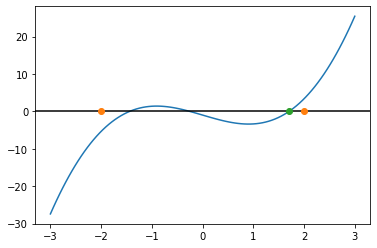

In [6]:
from scipy.optimize import bisect
def f(x):
    return x**3 - 4*np.sin(x) - 1
a, b = -2, 2
x0 = bisect(f, a, b)
xs = np.linspace(a-1,b+1,100) # regularly spaced points
plt.plot(xs,f(xs))            # draw f
plt.axhline(color='k')        # draw x axis
plt.plot([a, b], [0,0], 'o')  # initial interval
plt.plot([x0], [0], 'o')      # root


In [29]:
def f(x):
    return 1 + (x**3 - 4*x) + np.log(1+x**2)

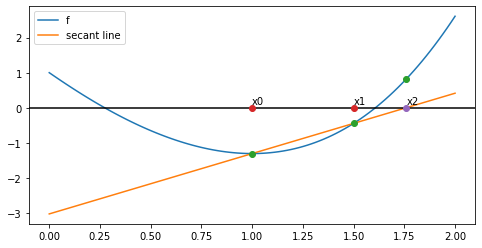

In [31]:
a, b = 0, 2
x0,x1=1,1.5
x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
xs = np.linspace(a,b,100) # regularly spaced points
ls = f(x0) + (xs-x0)*(f(x1)-f(x0))/(x1-x0)
plt.figure(figsize=(8,4))
plt.plot(xs,f(xs), label='f')            # draw f
plt.plot(xs,ls, label='secant line')            # draw f
plt.axhline(color='k')        # draw x axis
plt.plot([x0,x1,x2], [f(x0),f(x1),f(x2)], 'o')      # root
plt.plot([x0,x1], [0,0], 'o')      # root
plt.plot([x2], [0], 'o')      # root
plt.text(x0,0.1,'x0')
plt.text(x1,0.1,'x1')
plt.text(x2,0.1,'x2')
plt.legend()

Newton

In [26]:
import sympy as sym

# Definimos un símbolo, que usaremos para definir funciones
x = sym.symbols('x')

# y es una función simbólica de x
y = 1 + (x**3 - 4*x) + sym.log(1+x**2)

# derivada es una función simbólica de x
derivada = sym.diff(y,x)

# lambdify convierte la función simbólica en una función 
# normal, que además acepta arrays de numpy como argumentos
f = sym.lambdify(x, y)
fp = sym.lambdify(x, derivada)

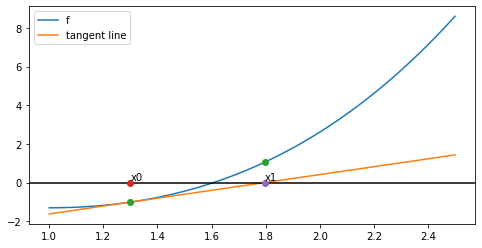

In [28]:
a, b = 1, 2.5
x0 = 1.3
x1 = x0 - f(x0)/fp(x0)
xs = np.linspace(a,b,100) # regularly spaced points
ls = f(x0) + (xs-x0)*fp(x0)
plt.figure(figsize=(8,4))
plt.plot(xs,f(xs), label='f')            # draw f
plt.plot(xs,ls, label='tangent line')            # draw f
plt.axhline(color='k')        # draw x axis
plt.plot([x0,x1], [f(x0),f(x1)], 'o')      # root
plt.plot([x0], [0], 'o')      # root
plt.plot([x1], [0], 'o')      # root
plt.text(x0,0.1,'x0')
plt.text(x1,0.1,'x1')
plt.legend()

Text(1.6228499844734348, 0.1, 'x2')

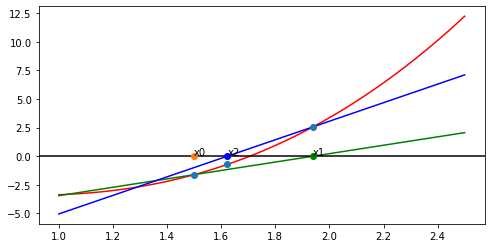

In [23]:
a, b = 1, 2.5
x0 = 1.5
x1 = x0 - f(x0)/fp(x0)
x2 = x1 - f(x1)/fp(x1)
xs = np.linspace(a,b,100) # regularly spaced points
ls1 = f(x0) + (xs-x0)*fp(x0)
ls2 = f(x1) + (xs-x1)*fp(x1)
plt.figure(figsize=(8,4))
plt.plot(xs,f(xs), 'r')            # draw f
plt.plot(xs,ls1,'g')            # draw f
plt.plot(xs,ls2,'b')            # draw f
plt.axhline(color='k')        # draw x axis
plt.plot([x0,x1,x2], [f(x0),f(x1),f(x2)], 'o')      # root
plt.plot([x0], [0], 'o')      # root
plt.plot([x1], [0], 'og')      # root
plt.plot([x2], [0], 'ob')      # root
plt.text(x0,0.1,'x0')
plt.text(x1,0.1,'x1')
plt.text(x2,0.1,'x2')

In [37]:
def F(xs):
    x,y=xs
    return y + np.log(x), x-np.sin(y)
output = root(F, [1,1])
F(output['x'])

(1.970423824104728e-12, 5.387912338505885e-13)

In [1]:
import numpy as np
import numpy.random
import scipy as sp
import scipy.linalg as la
from scipy.interpolate import lagrange
import sympy as sym
import matplotlib.pyplot as plt

In [3]:
cs = np.polyfit()

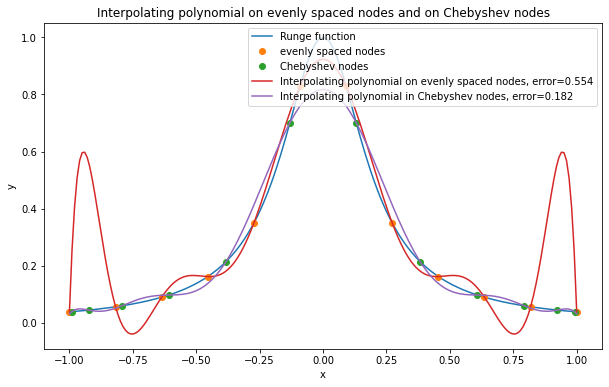

In [8]:
## Comparamos la función de Runge con el polinomio interpolador
# en unos cuantos puntos equiespaciados

def f(x):
    return 1/(1+25*x**2)

# Nodos de interpolación
n = 12
xs_equi = np.linspace(-1,1,n)
ys_equi = f(xs_equi)

xs_cheb = np.array([np.cos(((2*k-1)*np.pi)/(2*n)) for k in range(1,n+1)])
ys_cheb = f(xs_cheb)

# Ahora evaluamos en un array de puntos, para dibujar el polinomio interpolador
x_eval = np.linspace(-1,1,200)
coefs_lagrange_equi = np.polyfit(xs_equi, ys_equi, n-1)
y_lagrange_equi = np.polyval(coefs_lagrange_equi, x_eval)
coefs_lagrange_cheb = np.polyfit(xs_cheb, ys_cheb, n-1)
y_lagrange_cheb = np.polyval(coefs_lagrange_cheb, x_eval)
y_runge = f(x_eval)

plt.figure(figsize=(10,6))
plt.plot(x_eval, y_runge, label='Runge function')
plt.plot(xs_equi, ys_equi, 'o', label='evenly spaced nodes')
plt.plot(xs_cheb, ys_cheb, 'o', label='Chebyshev nodes')
plt.plot(x_eval, y_lagrange_equi, 
         label='Interpolating polynomial on evenly spaced nodes, error=%.3f'%
                np.max(np.abs(y_lagrange_equi - y_runge)))
plt.plot(x_eval, y_lagrange_cheb, 
         label='Interpolating polynomial in Chebyshev nodes, error=%.3f'%
                np.max(np.abs(y_lagrange_cheb - y_runge)))
plt.title('Interpolating polynomial on evenly spaced nodes and on Chebyshev nodes' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [11]:
CubicSpline?

In [10]:
from scipy.interpolate import CubicSpline
